# **FINAL PROJECT - ANALISIS PREDIKSI TINGKAT RISIKO REKSA DANA PADA APLIKASI BIBIT**


#Load Library

In [2]:
# LOAD LIBARY

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report

#Load Data

In [3]:
url = 'https://raw.githubusercontent.com/Khansamuti/analisis_bibit/main/Analisis_Reksa_Dana_Bibit.csv'
data = pd.read_csv(url, sep = ';', decimal = ',', header = 0)
data.head()

,No,Nama,CAGR_1Y,Expense_Ratio,Total_AUM,Drawdown_1Y,Jenis,Tingkat_Risiko,NAV,Unnamed: 9,Unnamed: 10
0,1,Batavia Dana Kas Maxima,2.79,1.99,10.10,0.00,Pasar Uang,Rendah,1673.6500,NaN,NaN
1,2,Sucorinvest Money Market Fund,3.65,1.49,6.01,-0.01,Pasar Uang,Rendah,1703.8700,NaN,NaN
2,3,Bahana Dana Likuid,2.83,1.27,5.92,-0.01,Pasar Uang,Rendah,1740.5100,NaN,NaN
3,4,TRIM Kas 2,3.87,1.02,3.44,0.00,Pasar Uang,Rendah,1754.4526,NaN,NaN
4,5,Manulife Dana Kas II Kelas A,2.76,1.06,2.77,-0.04,Pasar Uang,Rendah,1671.6400,NaN,NaN


#Eksplorasi Data

## Menghapus Atribut yang Tidak Dibutuhkan

In [4]:
dropdf = ["Unnamed: 9", "Unnamed: 10", "No", "Nama"]
data = data.drop(dropdf, axis='columns')

## Missing Value

In [5]:
# Checking missing value
print(data.isnull().sum().sort_values(ascending=False))

CAGR_1Y           0
Expense_Ratio     0
Total_AUM         0
Drawdown_1Y       0
Jenis             0
Tingkat_Risiko    0
NAV               0
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CAGR_1Y         91 non-null     float64
 1   Expense_Ratio   91 non-null     float64
 2   Total_AUM       91 non-null     float64
 3   Drawdown_1Y     91 non-null     float64
 4   Jenis           91 non-null     object 
 5   Tingkat_Risiko  91 non-null     object 
 6   NAV             91 non-null     float64
dtypes: float64(5), object(2)
memory usage: 5.1+ KB


## Check Data Duplikat

In [7]:
# Checking duplicate data
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [CAGR_1Y, Expense_Ratio, Total_AUM, Drawdown_1Y, Jenis, Tingkat_Risiko, NAV]
Index: []


In [8]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
86    False
87    False
88    False
89    False
90    False
Length: 91, dtype: bool

## Check Outlier Data

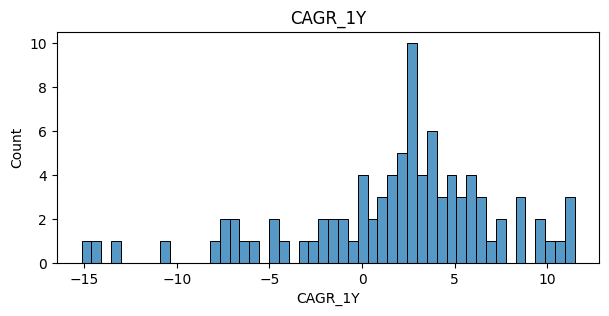

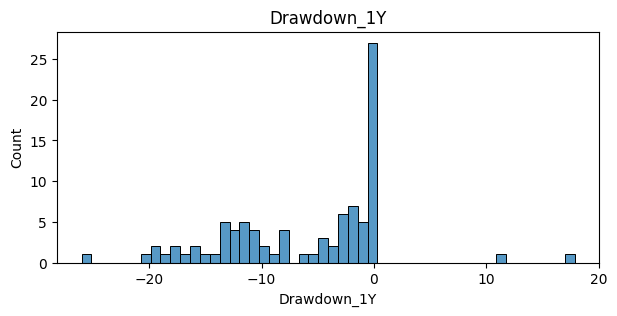

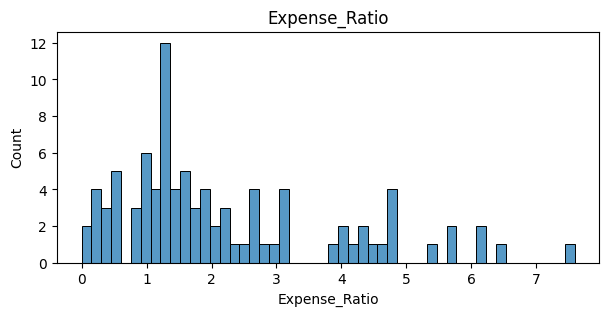

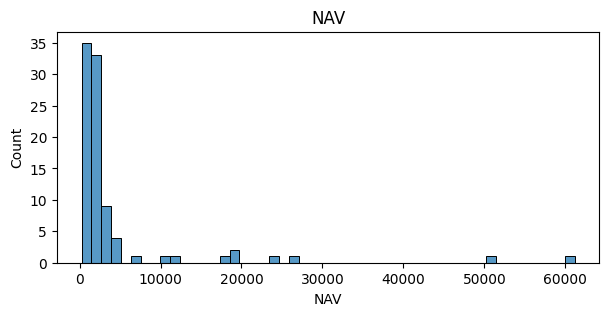

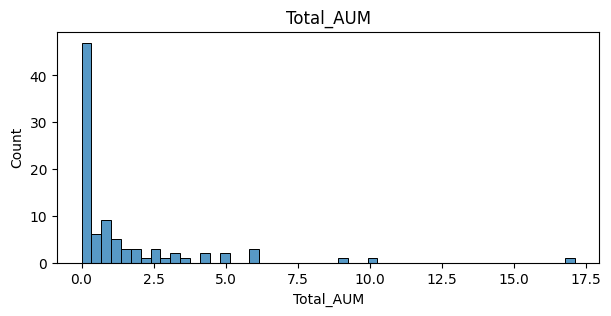

In [9]:
# Check Outlier
## Sclicing between categorical and numerical variable
categorical_cols = [
    'Tingkat_Risiko',
    'Jenis'
]
num_cols = data.columns.difference(categorical_cols)

## Visualisation from numerical variable
for c in num_cols:
    fig = plt.figure(figsize=(7, 3))

    sns.histplot(data[c], bins=50)
    plt.title(c)
    plt.show()

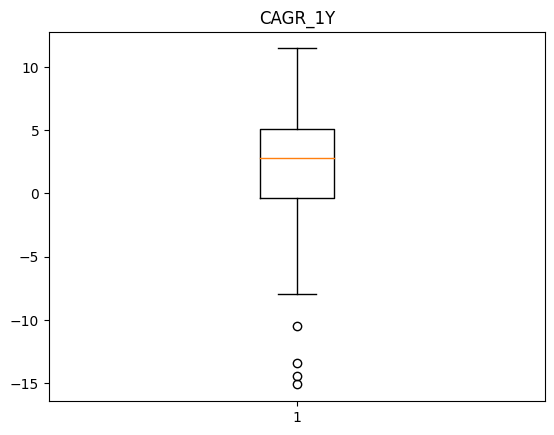

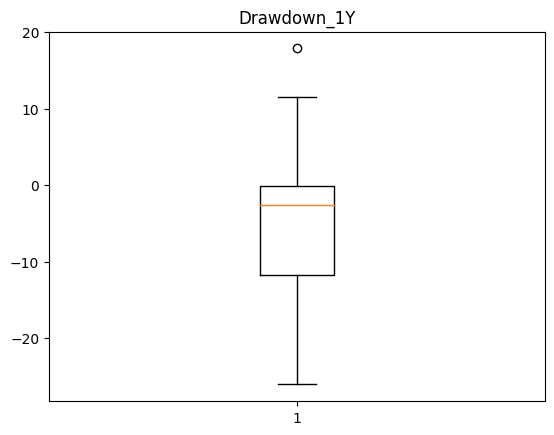

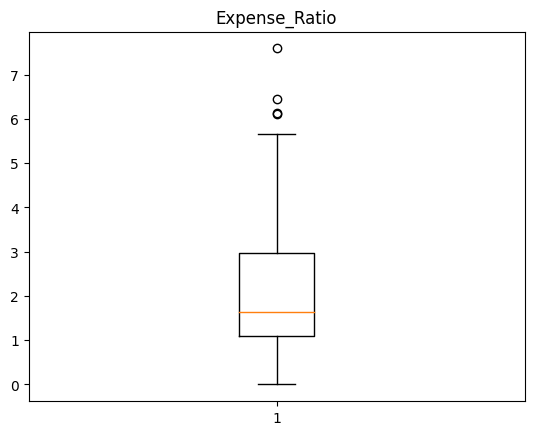

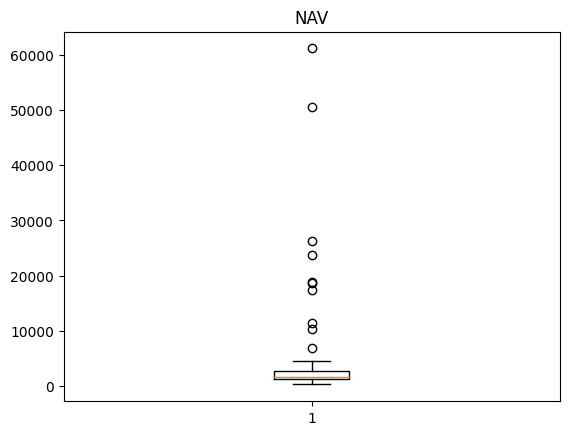

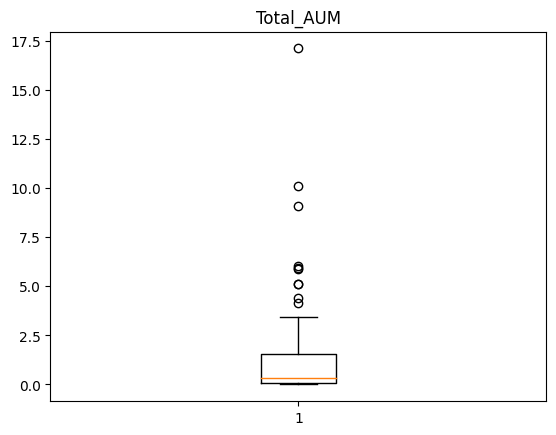

In [10]:
# Menampilkan boxplot untuk setiap kolom numeric
for col in num_cols:
    plt.figure()
    plt.boxplot(data[col])
    plt.title(col)

# Menampilkan plot
plt.show()

Outlier tidak dihapus karena semua nilai dianggap penting dalam proses analisis.

## Visualisasi Jumlah Reksa Dana

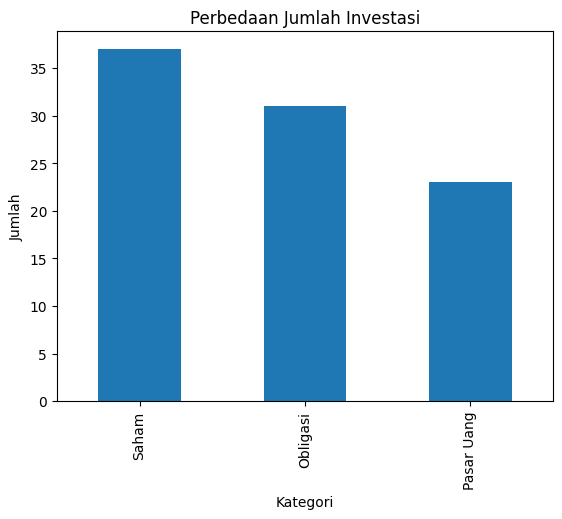

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

series_jenis = pd.Series(data["Jenis"])
count = series_jenis.value_counts()

count.plot(kind='bar')

plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Perbedaan Jumlah Investasi')

plt.show()

## Data Informasi

In [12]:
data.describe(include='all')

,CAGR_1Y,Expense_Ratio,Total_AUM,Drawdown_1Y,Jenis,Tingkat_Risiko,NAV
count,91.000000,91.000000,91.000000,91.000000,91,91,91.000000
unique,NaN,NaN,NaN,NaN,3,3,NaN
top,NaN,NaN,NaN,NaN,Saham,Tinggi,NaN
freq,NaN,NaN,NaN,NaN,37,37,NaN
mean,1.825714,2.202308,1.411283,-5.852418,NaN,NaN,4274.157927
std,5.568120,1.700084,2.561435,7.254326,NaN,NaN,9120.005197
min,-15.130000,0.000000,0.000040,-26.030000,NaN,NaN,244.860000
25%,-0.370000,1.090000,0.095000,-11.695000,NaN,NaN,1277.572000
50%,2.760000,1.630000,0.337350,-2.630000,NaN,NaN,1663.890000
75%,5.125000,2.980000,1.560000,-0.100000,NaN,NaN,2707.640000


In [13]:
data.shape

(91, 7)

#Data Encoding

In [14]:
# Transforming all categorical data into numerical approach
data['Tingkat_Risiko'].replace(['Rendah', 'Sedang', 'Tinggi'], [0, 1, 2], inplace=True)
data['Jenis'].replace(['Pasar Uang', 'Obligasi', 'Saham'], [0, 1, 2], inplace=True)

#Uji Korelasi

<Axes: >

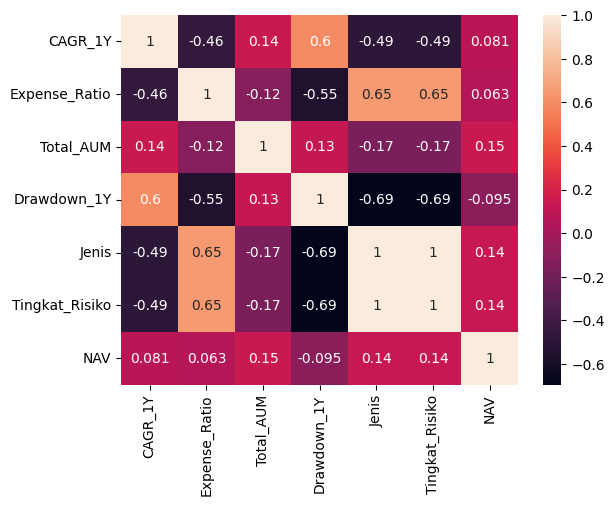

In [15]:
corr = data.corr()

sns.heatmap(corr, annot = True)

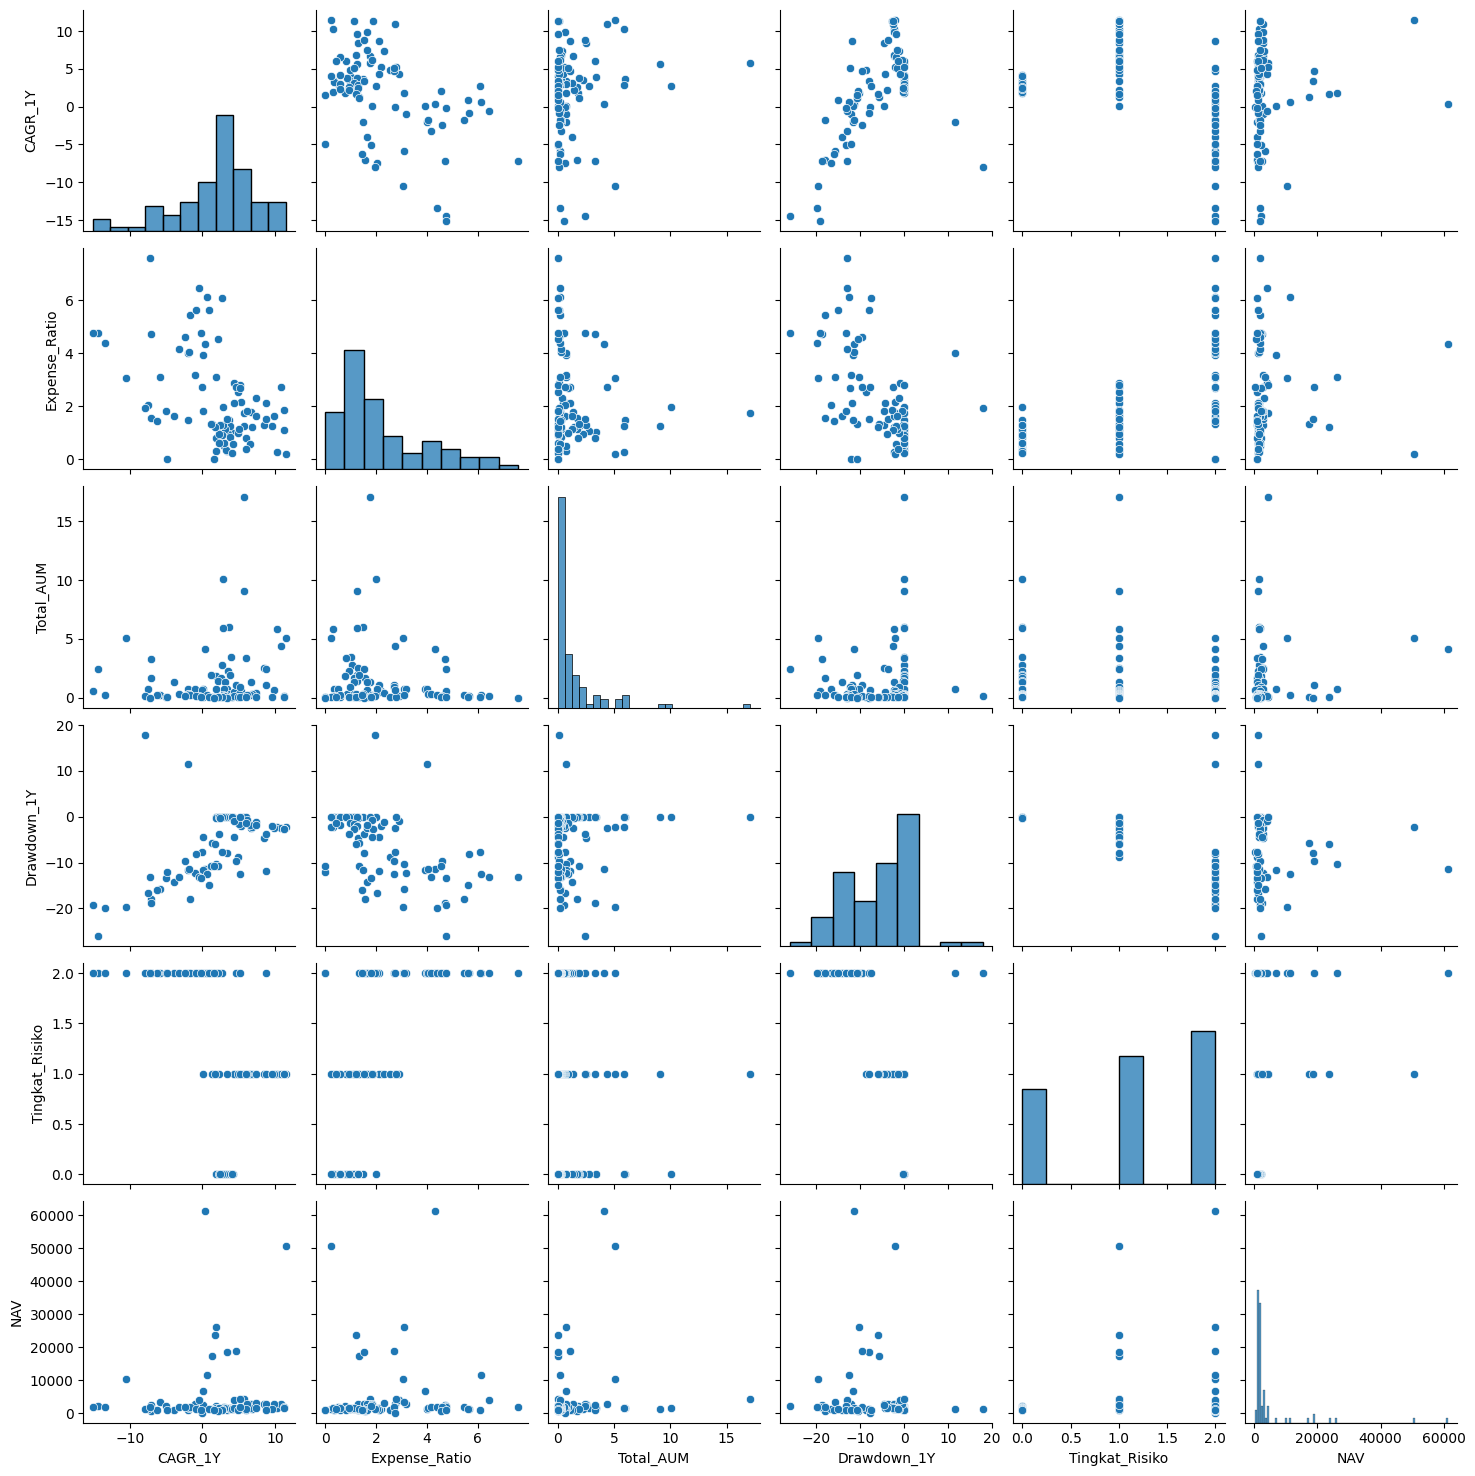

In [16]:
sns.pairplot(data = data.drop('Jenis', axis = 1))

In [17]:
data

,CAGR_1Y,Expense_Ratio,Total_AUM,Drawdown_1Y,Jenis,Tingkat_Risiko,NAV
0,2.79,1.99,10.100,0.00,0,0,1673.6500
1,3.65,1.49,6.010,-0.01,0,0,1703.8700
2,2.83,1.27,5.920,-0.01,0,0,1740.5100
3,3.87,1.02,3.440,0.00,0,0,1754.4526
4,2.76,1.06,2.770,-0.04,0,0,1671.6400
...,...,...,...,...,...,...,...
86,2.08,4.54,0.040,-10.66,2,2,611.0724
87,-0.23,4.76,0.032,-13.35,2,2,930.8528
88,-4.96,0.00,0.027,-12.09,2,2,946.8700
89,0.89,5.63,0.021,-14.99,2,2,1342.6900


# MACHINE LEARNING APLICATION

## SPLIT DATA

In [18]:
#Memisahkan target variabel "Tingkat_Risiko" dengan feature lainnya
x=data.drop(['Tingkat_Risiko', 'Jenis'], axis=1)
y=data.Tingkat_Risiko
x.head()

,CAGR_1Y,Expense_Ratio,Total_AUM,Drawdown_1Y,NAV
0,2.79,1.99,10.10,0.00,1673.6500
1,3.65,1.49,6.01,-0.01,1703.8700
2,2.83,1.27,5.92,-0.01,1740.5100
3,3.87,1.02,3.44,0.00,1754.4526
4,2.76,1.06,2.77,-0.04,1671.6400


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Tingkat_Risiko, dtype: int64

In [20]:
#Membagi data menjadi data training dan data testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y, random_state=42) #perbandingan 3:7 -> 30% untuk data testing dan 70% untuk data training

## FEATURES SCALING

standarisasi

In [21]:
sc = StandardScaler() #untuk normalisasi data
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# CLASSIFICATION METHOD

## NAIVE BAYES

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


P-value:  0.5237036414687785
Akurasi:  0.9642857142857143
Presisi:  0.9672619047619048
Recall:  0.9642857142857143
F1-score:  0.964122262177182


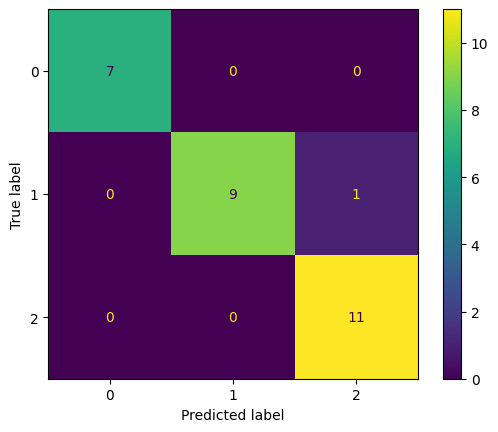

In [23]:
# Membuat model Naive-Bayes
model = GaussianNB()

# Melatih model dengan data latih
model.fit(x_train, y_train)

# Memprediksi variabel dependen dengan data uji
y_pred = model.predict(x_test)
# print(y_pred)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan p-value
from scipy.stats import chi2

p_values = chi2.sf(model.score(x, y), 1)

print('P-value: ', p_values)

# Menampilkan akurasi model
print('Akurasi: ', accuracy)
print('Presisi: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)

## Support Vector Machine

Akurasi: 0.8571428571428571
Presisi:  0.8803571428571428
Recall:  0.8571428571428571
F1-score:  0.8578097905828999


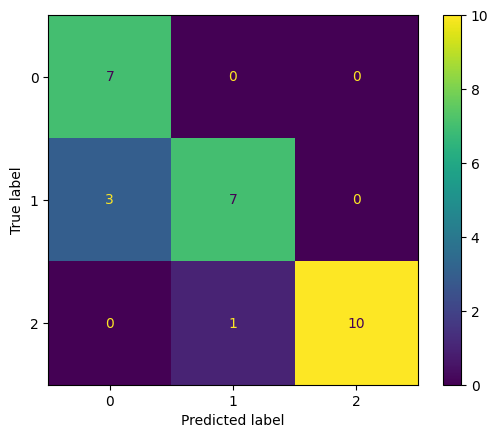

In [24]:
from sklearn import svm

# Inisialisasi model klasifikasi Support Vector Machine (SVM)
clf = svm.SVC()

# Latih model dengan data latih
clf.fit(x_train, y_train)

# Prediksi kelas menggunakan data uji
y_pred = clf.predict(x_test)

# Hitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#confusion matriks
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Akurasi:", accuracy)
print('Presisi: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)

## DECISION TREE

### Dengan Cross validation


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

treeclf = DecisionTreeClassifier()

rf_random = RandomizedSearchCV(
    estimator=treeclf,
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(x_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 80}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


P-value:  0.5020741445003578
Akurasi:  0.9642857142857143
Presisi:  0.9672619047619048
Recall:  0.9642857142857143
F1-score:  0.964122262177182


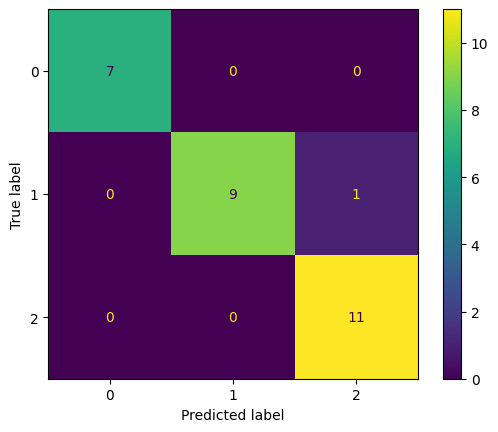

In [26]:
# Memprediksi variabel dependen dengan data uji
y_coba = rf_random.predict(x_test)

# Menampilkan p-value
from scipy.stats import chi2
p_values = chi2.sf(rf_random.score(x, y), 1)
print('P-value: ', p_values)

# Mengukur akurasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
accuracy = accuracy_score(y_test,y_coba)
precision = precision_score(y_test, y_coba, average='weighted')
recall = recall_score(y_test, y_coba, average='weighted')
f1 = f1_score(y_test, y_coba, average='weighted')

#confusion matrix
cm = confusion_matrix(y_test, y_coba)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Menampilkan akurasi model
print('Akurasi: ', accuracy)
print('Presisi: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)

### Tanpa Cross Validation

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


P-value:  0.49690584756476786
Akurasi:  0.8571428571428571
Presisi:  0.8571428571428571
Recall:  0.8571428571428571
F1-score:  0.8571428571428571


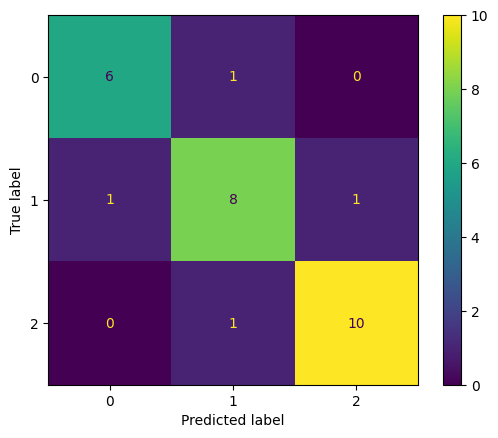

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
tree_clf = DecisionTreeClassifier()

# Melatih model dengan data latih
tree_clf.fit(x_train, y_train)

# Memprediksi variabel dependen dengan data uji
y_test_pred = tree_clf.predict(x_test)

# Menampilkan p-value
from scipy.stats import chi2
p_values = chi2.sf(tree_clf.score(x, y), 1)
print('P-value: ', p_values)

# Mengukur akurasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
accuracy = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Menampilkan akurasi model
print('Akurasi: ', accuracy)
print('Presisi: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)

Hasil dari ***decision tree*** tidak tetap atau berubah-ubah. Agar hasilnya tetap, menggunakan ***cross validation*** untuk mengevaluasi model sehinggal dihasilkan model yang maksimal.

## RANDOM FOREST

Akurasi: 0.9642857142857143
Presisi:  0.9672619047619048
Recall:  0.9642857142857143
F1-score:  0.964122262177182


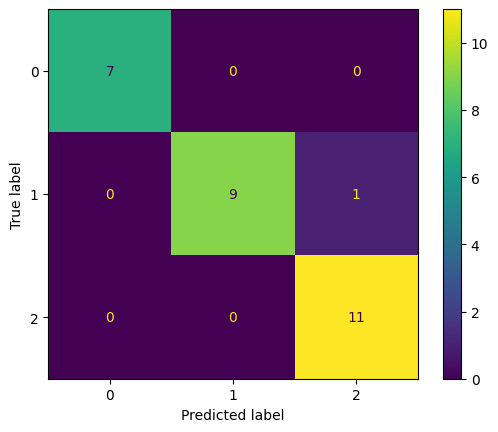

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model klasifikasi Random Forest
clf1 = RandomForestClassifier(n_estimators=45, random_state=42)

# Latih model dengan data latih
clf1.fit(x_train, y_train)

# Prediksi kelas menggunakan data uji
y_pred = clf1.predict(x_test)

# Hitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Akurasi:", accuracy)
print('Presisi: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)

# Test Model

In [40]:
# Test Model
cagr = 3.12
exp = 0.51
aum = 1.16
drawdown = -0.1
nav = 1785.3500

features = np.array((cagr, exp, aum, drawdown, nav))
datas = np.reshape(features, (1,-1))

resiko_nb = model.predict(datas)
if resiko_nb == 0:
  print("Hasil prediksi dengan model Naives Bayes: Rendah")
elif resiko_nb == 1:
  print("Hasil prediksi dengan model Naive Bayes: Sedang")
else:
  print("Hasil prediksi dengan model Naive Bayes: Tinggi")

resiko_svm = clf.predict(datas)
if resiko_svm == 0:
  print("Hasil prediksi dengan model SVM: Rendah")
elif resiko_svm == 1:
  print("Hasil prediksi dengan model SVM: Sedang")
else:
  print("Hasil prediksi dengan model SVM: Tinggi")

resiko_rf = clf1.predict(datas)
if resiko_rf == 0:
  print("Hasil prediksi dengan model Random Forest: Rendah")
elif resiko_rf == 1:
  print("Hasil prediksi dengan model Random Forest: Sedang")
else:
  print("Hasil prediksi dengan model Random Forest: Tinggi")

resiko_dt = rf_random.predict(datas)
if resiko_dt == 0:
  print("Hasil prediksi dengan model Decision Tree: Rendah")
elif resiko_dt == 1:
  print("Hasil prediksi dengan model Decision Tree: Sedang")
else:
  print("Hasil prediksi dengan model Decision Tree: Tinggi")

Hasil prediksi dengan model Naive Bayes: Tinggi
Hasil prediksi dengan model SVM: Tinggi
Hasil prediksi dengan model Random Forest: Sedang
Hasil prediksi dengan model Decision Tree: Sedang
